# 第8章 预测数值型数据：回归

本章内容：
- 线性回归
- 局部加权线性回归
- 岭回归和逐步线性回归
- 预测鲍鱼年龄和玩具售价

## 8.1 用线性回归找到最佳拟合直线

<center>**线性回归**</center>
- 优点：结果易于理解，计算上不复杂。
- 缺点：对非线性的数据拟合不好。
- 使用数据类型：数值型和标称型数据。

<center>**回归的一般方法**</center>
(1)收集数据：采用任意方法收集数据。  
(2)准备数据：回归需要数值型数据，标称型数据将被转成二值型数据。  
(3)分析数据：绘出数据的可视化二维图将有助于对数据做出理解和分析，在采用缩减法求得新回归系数之后，可以将新拟合线绘在图上作为对比。  
(4)训练算法：找到回归系数。  
(5)测试算法：使用R2或者预测值和数据的拟合度，来分析模型的效果。  
(6)使用算法：使用回归，可以在给定输入的时候预测出一个数值，这是对分类方法的提升，因为这样可以预测连续型数据而不仅仅是离散的类别标签。

###### 程序清单8-1 标准回归函数和数据导入函数

In [3]:
import numpy as np

def loadDataSet(filename):
    numFeat = len(open(filename).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return 
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [5]:
xArr, yArr = loadDataSet('./Data/ex0.txt')

In [6]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [7]:
ws = standRegres(xArr, yArr)

In [9]:
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [10]:
xMat = np.mat(xArr)
yMat = np.mat(yArr)
yHat = xMat * ws
yHat

matrix([[ 3.12257084],
        [ 3.73301922],
        [ 4.69582855],
        [ 4.25946098],
        [ 4.67099547],
        [ 3.89977285],
        [ 3.65007895],
        [ 3.06514517],
        [ 3.23286683],
        [ 3.24221654],
        [ 3.42785945],
        [ 4.10677005],
        [ 4.24737842],
        [ 3.40925159],
        [ 4.6518468 ],
        [ 4.03763819],
        [ 3.61572324],
        [ 3.25838991],
        [ 4.08905393],
        [ 3.39829811],
        [ 3.12681762],
        [ 3.12159094],
        [ 4.57689489],
        [ 4.22453225],
        [ 3.03380205],
        [ 3.575795  ],
        [ 3.07638008],
        [ 3.36812645],
        [ 4.05412689],
        [ 3.92524508],
        [ 3.08463121],
        [ 3.22264573],
        [ 3.95116656],
        [ 4.53547307],
        [ 4.63266931],
        [ 3.47321272],
        [ 3.67637171],
        [ 4.48687834],
        [ 3.70271024],
        [ 4.54873897],
        [ 3.29055527],
        [ 4.13515992],
        [ 3.4548456 ],
        [ 3

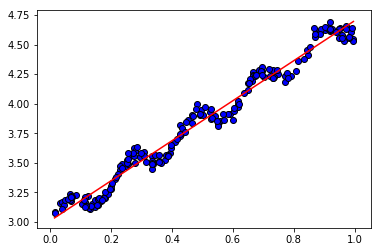

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0], c='b', edgecolors="black")

xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:, 1], yHat, color='r')

plt.show()

In [19]:
yHat = xMat * ws
np.corrcoef(yHat.T, yMat)

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])

## 8.2 局部加权线性回归

线性回归的一个问题是有可能出现欠拟合现象，因为它求的是具有最小均方误差的无偏估计。

###### 程序清单8-2 局部加权线性回归函数

In [23]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye(m))
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j,j] = np.exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return 
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat        

In [21]:
xArr, yArr = loadDataSet('./Data/ex0.txt')
yArr[0]

3.176513

In [24]:
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[ 3.12204471]])

In [25]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[ 3.20175729]])

In [27]:
yHat = lwlrTest(xArr, xArr, yArr, 0.003)

## 8.3 示例：预测鲍鱼的年龄

In [1]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

In [ ]:
abX, abY = loadDataSet('./Data/abalone.txt')
yHat01 = lwlr